### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

**Dependent Variable:** Time taken to name the ink color of words in a list<br>
**Independent Variable:** The condition of the words in the list, ie Congruent vs Non-Congruent

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The hypothesis is that words being incongruent causes participants to take a longer time naming the colors of the ink.

**The null hypothesis ($H_o$)**: The words being incongruent does not increase the time taken to name the color of the word ink: $$H_o: \mu_i \leq \mu_c$$ 


**The alternative hypothesis ($H_a$)**: The words being incongruent causes an increase in time taken to name the color of the word ink: $$H_a: \mu_i \gt \mu_c$$

$\mu_i:$ Incongruent Population Mean<br>
$\mu_c:$ Congruent Population Mean


I will be using a dependent positive one-tailed t-test to test this hypothesis. <br>

This t-test includes the following assumptions:

The scale of measurement applied to the data collected follows a continuous or ordinal scale<br>
The data collected is from a simple random sample representative of the population<br>
Sets of data used to produce the difference are linked in the population<br>
Sample scores and difference scores are normally distributed <br>

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [46]:
import csv
import numpy as np
from IPython.display import Markdown as md

with open('stroopdata.csv') as file:
    data = csv.reader(file, delimiter=",")
    has_header = csv.Sniffer().has_header(file.readline())
    congruent, incongruent = [], []
    for row in data:
        congruent.append(float(row[0]))
        incongruent.append(float(row[1]))
    
#Calculate the mean and sample standard deviation for both result sets
congruent_mean = np.mean(congruent)
incongruent_mean = np.mean(incongruent)
congruent_std = np.std(congruent, ddof=1)
incongruent_std = np.std(incongruent, ddof=1)

#Display the results
display(md("$\overline{X}_c$ : "),congruent_mean)
display(md("$\overline{X}_i$ : "),incongruent_mean)
display(md("$S_c$ : "),congruent_std)
display(md("$S_i$ : "),incongruent_std)


$\overline{X}_c$ : 

14.051124999999999

$\overline{X}_i$ : 

22.015916666666669

$S_c$ : 

3.559357957645195

$S_i$ : 

4.7970571224691376

Run above code to generate the mean and the sample standard deviation for the congruent and incongruent result sets respectively

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

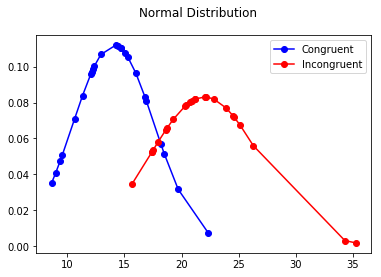

In [47]:
import pylab as plot
import scipy.stats as stats

congruent.sort()
incongruent.sort()

#Get the probability density function for both result sets
congruent_pdf = stats.norm.pdf(congruent_sorted, congruent_mean, congruent_std) 
incongruent_pdf = stats.norm.pdf(incongruent_sorted, incongruent_mean, incongruent_std) 

#Plot the normal distribution for both result sets
fig= plot.figure()
fig.suptitle('Normal Distribution')
plot.plot(congruent_sorted, congruent_pdf, '-o', color = 'b', label= 'Congruent')
plot.plot(incongruent_sorted, incongruent_pdf, '-o', color = 'r', label = 'Incongruent')
plot.legend()
plot.show()

The incongruent result set has a higher mean and slightly wider normal distribution than the congurent result set.<br> 
The incongruent result set also seems to contain a couple of outlier values

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [51]:
import csv

with open('stroopdata.csv') as file:
    data = csv.reader(file, delimiter=",")
    has_header = csv.Sniffer().has_header(file.readline())
    congruent, incongruent = [], []
    for row in data:
        congruent.append(float(row[0]))
        incongruent.append(float(row[1]))

n = 24
#Degree of Freedom
df= n-1

#Calculate t-critical for alpha = 0.05
alpha = 0.05
t_crit = stats.t.ppf(1-alpha, n)

#Calculate Point Estimate
diff_mean = incongruent_mean - congruent_mean

#Calculate Sample Standard Deviation of difference
congruent = np.array(congruent)
incongruent = np.array(incongruent)
diff = incongruent - congruent
diff_std = np.std(diff, ddof=1)

#Calculate Standard Error
sem = diff_std / np.sqrt(n)

#Calculate t-statistic
t_stat = diff_mean / sem

#Calculate P-value
p_val = stats.t.sf(t_stat, df)


A positive one-tailed t-test was carried out, below are the results for $\alpha$ = 0.05. 

$t(24) = 8.02, p = 2.05\mathrm{e}{-08}$, one-tailed

Based on the above results ( **P-value** $\lt \alpha$ ), we can reject the null hypothesis with a high degree of confidence ( $p = 2.05\mathrm{e}{-08}$ ).<br> 
We can therefore conclude that the mean increase in time taken ( $\overline{X}_D = 7.96$ seconds ) to name ink colors for words in an incongruent condition compared to a congruent condition is statistically significant. The results of this test confiremd the expected effect that the words being incongruent increases the time it takes for participants to name the ink color.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The effect seems to be related to how reading comes so naturally to the brain it actually requires effort to prevent the brain from carrying out that cognitive function. Although not necessarily a task, but a similiar phenomenon can be observed when watching a movie with subtitles. It requires a bit of concentration to prevent oneself from reading a movie line before hearing it. It turns out this phenomenon has been studied and is referred to as 'interference'.


*Resources:*<br> 
https://stackoverflow.com<br>
https://d2l.deakin.edu.au/d2l/eP/presentations/presentation_preview_popup.d2l?presId=67655
http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm